In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('titanic.csv')  # Update path if needed
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()
df.describe(include='all')
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
# Count missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_table[missing_table['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


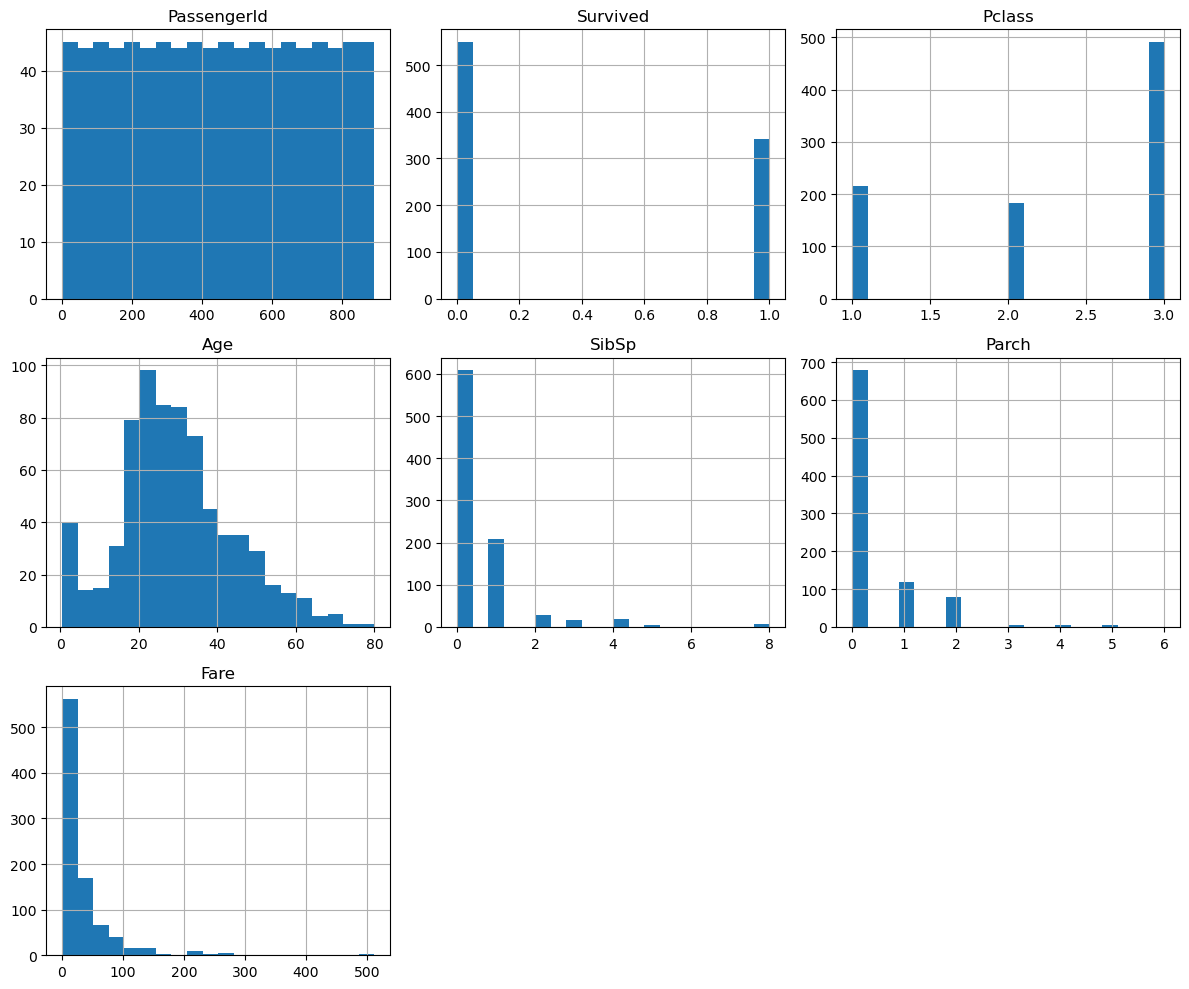

In [4]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


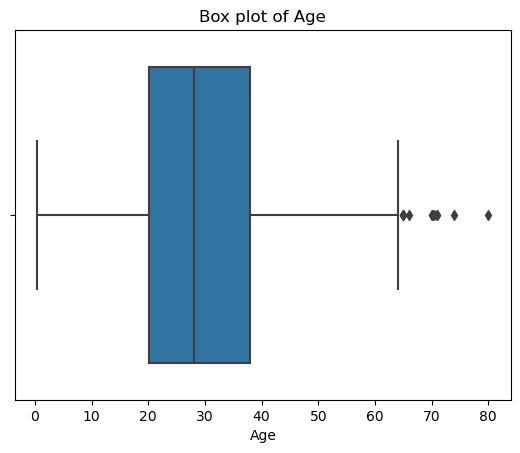

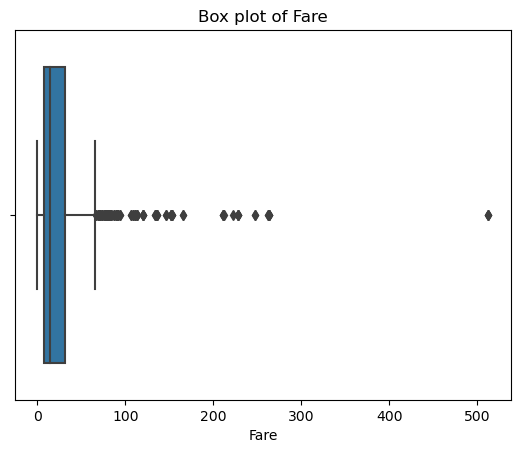

In [5]:
for col in ['Age', 'Fare']:
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()


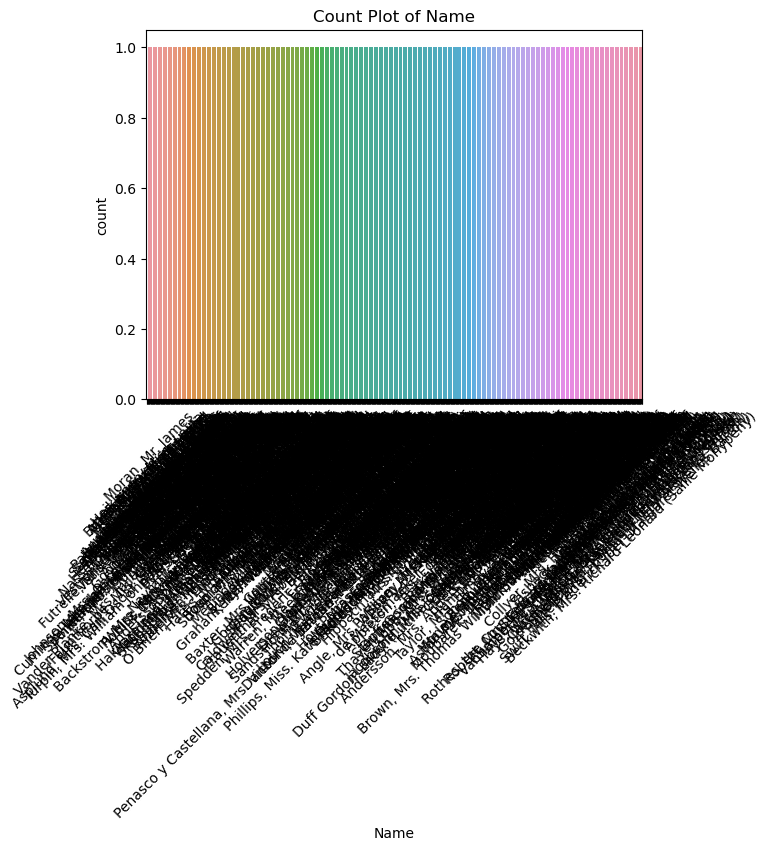

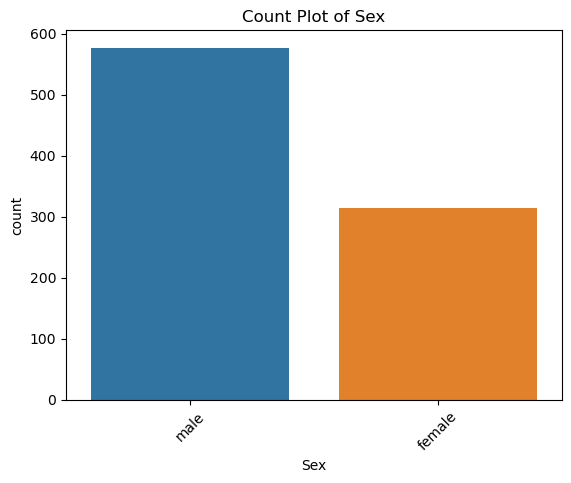

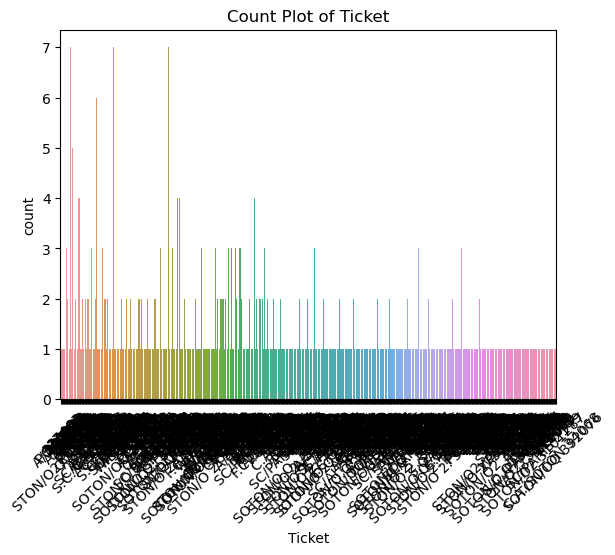

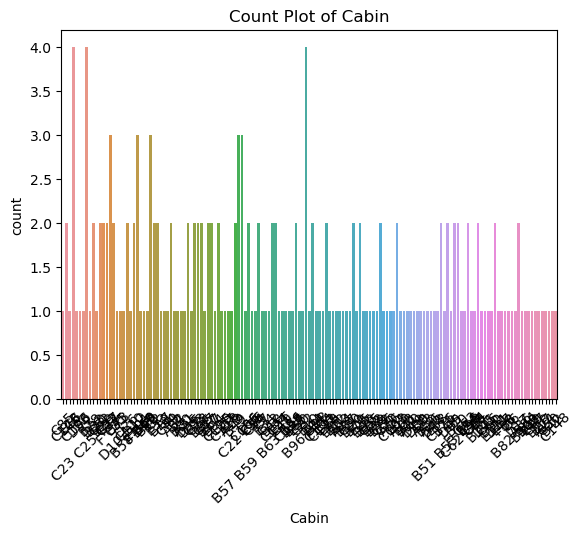

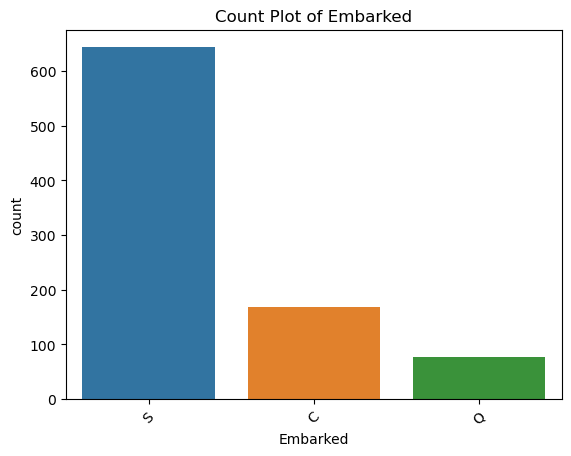

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


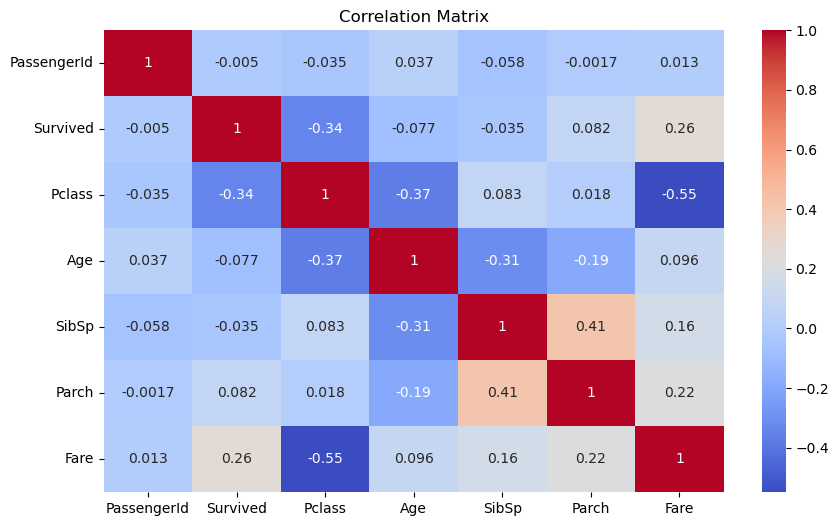

In [7]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


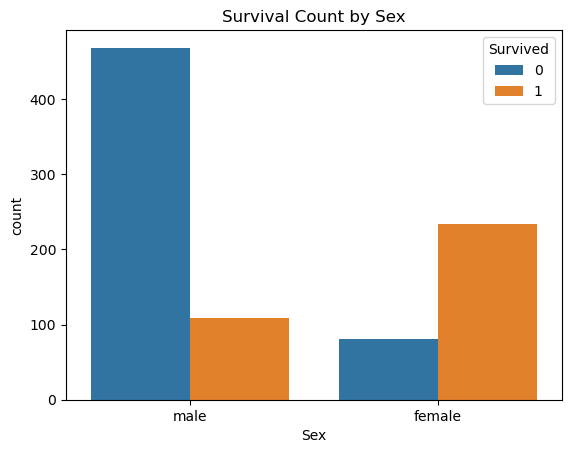

In [8]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()


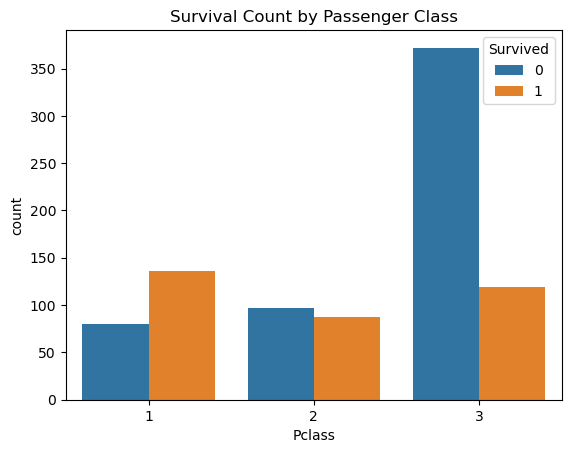

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


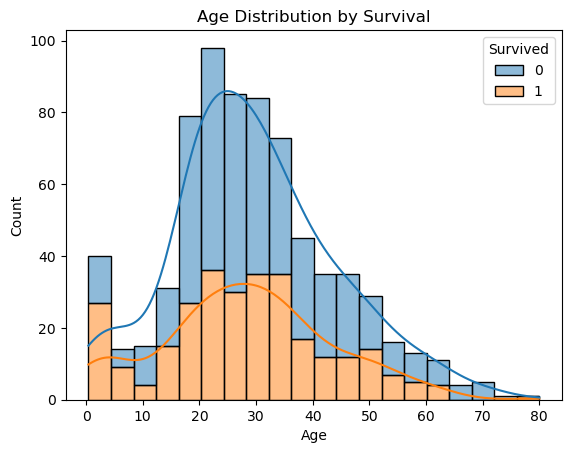

In [10]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()


In [11]:
from scipy.stats import zscore
df['Fare_z'] = zscore(df['Fare'])
outliers = df[np.abs(df['Fare_z']) > 3]
print(outliers[['Fare', 'Fare_z']])


         Fare    Fare_z
27   263.0000  4.647001
88   263.0000  4.647001
118  247.5208  4.335332
258  512.3292  9.667167
299  247.5208  4.335332
311  262.3750  4.634417
341  263.0000  4.647001
377  211.5000  3.610065
380  227.5250  3.932723
438  263.0000  4.647001
527  221.7792  3.817033
557  227.5250  3.932723
679  512.3292  9.667167
689  211.3375  3.606793
700  227.5250  3.932723
716  227.5250  3.932723
730  211.3375  3.606793
737  512.3292  9.667167
742  262.3750  4.634417
779  211.3375  3.606793


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


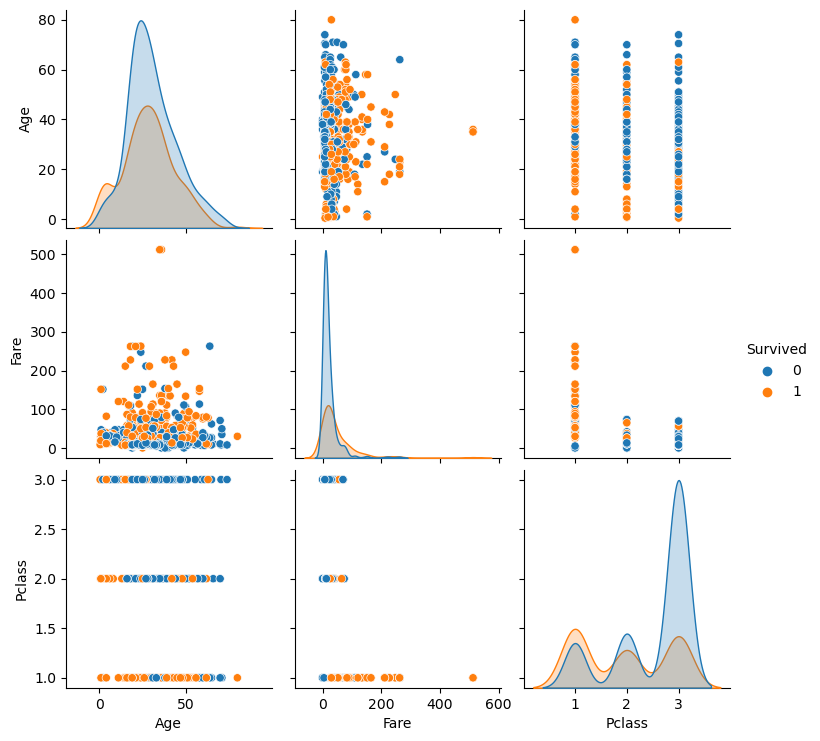

In [12]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()


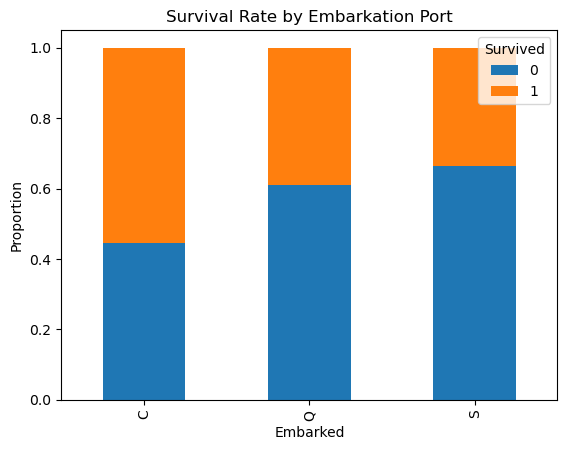

In [13]:
pd.crosstab(df['Embarked'], df['Survived'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Proportion')
plt.show()
